## Example model from tensorflow repo of a sine function
https://github.com/tensorflow/tensorflow/blob/be4f6874533d78f662d9777b66abe3cdde98f901/tensorflow/lite/experimental/micro/examples/hello_world/create_sine_model.ipynb
### This serves as simple example to be able to deploy something to the microcontroller

In [2]:
# TensorFlow is an open source machine learning library
# !pip install tensorflow==2.0
import tensorflow as tf
# Numpy is a math library
import numpy as np
# Matplotlib is a graphing library
import matplotlib.pyplot as plt
# math is Python's math library
import math

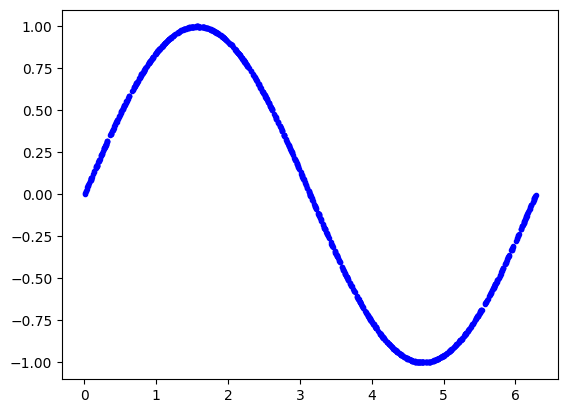

In [3]:
# We'll generate this many sample datapoints
SAMPLES = 1000

# Set a "seed" value, so we get the same random numbers each time we run this
# notebook. Any number can be used here.
SEED = 1337
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Generate a uniformly distributed set of random numbers in the range from
# 0 to 2π, which covers a complete sine wave oscillation
x_values = np.random.uniform(low=0, high=2*math.pi, size=SAMPLES)

# Shuffle the values to guarantee they're not in order
np.random.shuffle(x_values)

# Calculate the corresponding sine values
y_values = np.sin(x_values)

# Plot our data. The 'b.' argument tells the library to print blue dots.
plt.plot(x_values, y_values, 'b.')
plt.show()

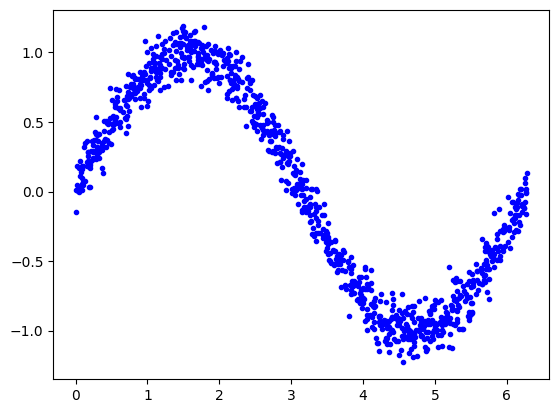

In [4]:
# Add a small random number to each y value
y_values += 0.1 * np.random.randn(*y_values.shape)

# Plot our data
plt.plot(x_values, y_values, 'b.')
plt.show()

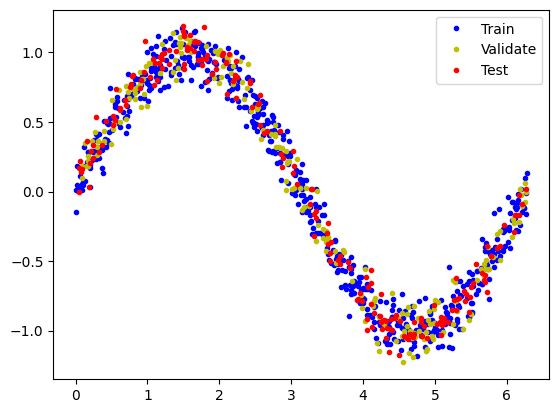

In [5]:
# We'll use 60% of our data for training and 20% for testing. The remaining 20%
# will be used for validation. Calculate the indices of each section.
TRAIN_SPLIT =  int(0.6 * SAMPLES)
TEST_SPLIT = int(0.2 * SAMPLES + TRAIN_SPLIT)

# Use np.split to chop our data into three parts.
# The second argument to np.split is an array of indices where the data will be
# split. We provide two indices, so the data will be divided into three chunks.
x_train, x_validate, x_test = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_validate, y_test = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT])

# Double check that our splits add up correctly
assert (x_train.size + x_validate.size + x_test.size) ==  SAMPLES

# Plot the data in each partition in different colors:
plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_validate, y_validate, 'y.', label="Validate")
plt.plot(x_test, y_test, 'r.', label="Test")
plt.legend()
plt.show()


In [6]:
# We'll use Keras to create a simple model architecture
from tensorflow.keras import layers
model_1 = tf.keras.Sequential()

# First layer takes a scalar input and feeds it through 16 "neurons". The
# neurons decide whether to activate based on the 'relu' activation function.
model_1.add(layers.Dense(16, activation='relu', input_shape=(1,)))

# Final layer is a single neuron, since we want to output a single value
model_1.add(layers.Dense(1))

# Compile the model using a standard optimizer and loss function for regression
model_1.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# Print a summary of the model's architecture
model_1.summary()
     

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Train the model on our training data while validating on our validation set
history_1 = model_1.fit(x_train, y_train, epochs=1000, batch_size=16,
                    validation_data=(x_validate, y_validate))

Epoch 1/1000


2022-12-20 15:12:30.055393: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


38/38 [==============================] - 0s 3ms/step - loss: 0.4830 - mae: 0.6152 - val_loss: 0.4520 - val_mae: 0.5910
Epoch 2/1000
38/38 [==============================] - 0s 762us/step - loss: 0.4044 - mae: 0.5535 - val_loss: 0.4136 - val_mae: 0.5551
Epoch 3/1000
38/38 [==============================] - 0s 720us/step - loss: 0.3741 - mae: 0.5294 - val_loss: 0.3835 - val_mae: 0.5387
Epoch 4/1000
38/38 [==============================] - 0s 707us/step - loss: 0.3484 - mae: 0.5124 - val_loss: 0.3558 - val_mae: 0.5150
Epoch 5/1000
38/38 [==============================] - 0s 719us/step - loss: 0.3238 - mae: 0.4954 - val_loss: 0.3290 - val_mae: 0.4930
Epoch 6/1000
38/38 [==============================] - 0s 708us/step - loss: 0.2996 - mae: 0.4767 - val_loss: 0.3067 - val_mae: 0.4743
Epoch 7/1000
38/38 [==============================] - 0s 715us/step - loss: 0.2789 - mae: 0.4594 - val_loss: 0.2878 - val_mae: 0.4621
Epoch 8/1000
38/38 [==============================] - 0s 680us/step - loss: 0

Epoch 62/1000
38/38 [==============================] - 0s 681us/step - loss: 0.1611 - mae: 0.3343 - val_loss: 0.1671 - val_mae: 0.3316
Epoch 63/1000
38/38 [==============================] - 0s 676us/step - loss: 0.1617 - mae: 0.3337 - val_loss: 0.1653 - val_mae: 0.3330
Epoch 64/1000
38/38 [==============================] - 0s 665us/step - loss: 0.1626 - mae: 0.3317 - val_loss: 0.1657 - val_mae: 0.3378
Epoch 65/1000
38/38 [==============================] - 0s 672us/step - loss: 0.1620 - mae: 0.3331 - val_loss: 0.1648 - val_mae: 0.3354
Epoch 66/1000
38/38 [==============================] - 0s 667us/step - loss: 0.1621 - mae: 0.3322 - val_loss: 0.1647 - val_mae: 0.3335
Epoch 67/1000
38/38 [==============================] - 0s 673us/step - loss: 0.1628 - mae: 0.3321 - val_loss: 0.1646 - val_mae: 0.3348
Epoch 68/1000
38/38 [==============================] - 0s 667us/step - loss: 0.1630 - mae: 0.3332 - val_loss: 0.1646 - val_mae: 0.3351
Epoch 69/1000
38/38 [==============================] - 

38/38 [==============================] - 0s 669us/step - loss: 0.1590 - mae: 0.3245 - val_loss: 0.1618 - val_mae: 0.3277
Epoch 183/1000
38/38 [==============================] - 0s 697us/step - loss: 0.1584 - mae: 0.3235 - val_loss: 0.1627 - val_mae: 0.3290
Epoch 184/1000
38/38 [==============================] - 0s 661us/step - loss: 0.1578 - mae: 0.3237 - val_loss: 0.1622 - val_mae: 0.3225
Epoch 185/1000
38/38 [==============================] - 0s 669us/step - loss: 0.1583 - mae: 0.3234 - val_loss: 0.1632 - val_mae: 0.3295
Epoch 186/1000
38/38 [==============================] - 0s 659us/step - loss: 0.1583 - mae: 0.3238 - val_loss: 0.1633 - val_mae: 0.3214
Epoch 187/1000
38/38 [==============================] - 0s 668us/step - loss: 0.1585 - mae: 0.3213 - val_loss: 0.1624 - val_mae: 0.3215
Epoch 188/1000
38/38 [==============================] - 0s 675us/step - loss: 0.1586 - mae: 0.3227 - val_loss: 0.1615 - val_mae: 0.3266
Epoch 189/1000
38/38 [==============================] - 0s 655u

38/38 [==============================] - 0s 686us/step - loss: 0.1570 - mae: 0.3174 - val_loss: 0.1597 - val_mae: 0.3167
Epoch 303/1000
38/38 [==============================] - 0s 679us/step - loss: 0.1548 - mae: 0.3164 - val_loss: 0.1596 - val_mae: 0.3165
Epoch 304/1000
38/38 [==============================] - 0s 667us/step - loss: 0.1571 - mae: 0.3171 - val_loss: 0.1593 - val_mae: 0.3182
Epoch 305/1000
38/38 [==============================] - 0s 670us/step - loss: 0.1568 - mae: 0.3176 - val_loss: 0.1598 - val_mae: 0.3162
Epoch 306/1000
38/38 [==============================] - 0s 666us/step - loss: 0.1571 - mae: 0.3168 - val_loss: 0.1596 - val_mae: 0.3167
Epoch 307/1000
38/38 [==============================] - 0s 686us/step - loss: 0.1573 - mae: 0.3167 - val_loss: 0.1595 - val_mae: 0.3197
Epoch 308/1000
38/38 [==============================] - 0s 683us/step - loss: 0.1564 - mae: 0.3162 - val_loss: 0.1620 - val_mae: 0.3236
Epoch 309/1000
38/38 [==============================] - 0s 673u

38/38 [==============================] - 0s 695us/step - loss: 0.1546 - mae: 0.3118 - val_loss: 0.1587 - val_mae: 0.3162
Epoch 423/1000
38/38 [==============================] - 0s 711us/step - loss: 0.1558 - mae: 0.3134 - val_loss: 0.1585 - val_mae: 0.3130
Epoch 424/1000
38/38 [==============================] - 0s 679us/step - loss: 0.1563 - mae: 0.3135 - val_loss: 0.1588 - val_mae: 0.3164
Epoch 425/1000
38/38 [==============================] - 0s 674us/step - loss: 0.1559 - mae: 0.3136 - val_loss: 0.1588 - val_mae: 0.3165
Epoch 426/1000
38/38 [==============================] - 0s 683us/step - loss: 0.1551 - mae: 0.3129 - val_loss: 0.1584 - val_mae: 0.3154
Epoch 427/1000
38/38 [==============================] - 0s 686us/step - loss: 0.1551 - mae: 0.3136 - val_loss: 0.1593 - val_mae: 0.3174
Epoch 428/1000
38/38 [==============================] - 0s 680us/step - loss: 0.1541 - mae: 0.3113 - val_loss: 0.1622 - val_mae: 0.3207
Epoch 429/1000
38/38 [==============================] - 0s 677u

38/38 [==============================] - 0s 675us/step - loss: 0.1556 - mae: 0.3114 - val_loss: 0.1578 - val_mae: 0.3120
Epoch 543/1000
38/38 [==============================] - 0s 692us/step - loss: 0.1537 - mae: 0.3104 - val_loss: 0.1578 - val_mae: 0.3119
Epoch 544/1000
38/38 [==============================] - 0s 659us/step - loss: 0.1543 - mae: 0.3093 - val_loss: 0.1597 - val_mae: 0.3163
Epoch 545/1000
38/38 [==============================] - 0s 683us/step - loss: 0.1531 - mae: 0.3079 - val_loss: 0.1611 - val_mae: 0.3175
Epoch 546/1000
38/38 [==============================] - 0s 674us/step - loss: 0.1543 - mae: 0.3098 - val_loss: 0.1586 - val_mae: 0.3146
Epoch 547/1000
38/38 [==============================] - 0s 666us/step - loss: 0.1512 - mae: 0.3073 - val_loss: 0.1691 - val_mae: 0.3083
Epoch 548/1000
38/38 [==============================] - 0s 667us/step - loss: 0.1549 - mae: 0.3102 - val_loss: 0.1582 - val_mae: 0.3102
Epoch 549/1000
38/38 [==============================] - 0s 660u

38/38 [==============================] - 0s 706us/step - loss: 0.1550 - mae: 0.3107 - val_loss: 0.1588 - val_mae: 0.3144
Epoch 663/1000
38/38 [==============================] - 0s 701us/step - loss: 0.1545 - mae: 0.3087 - val_loss: 0.1585 - val_mae: 0.3140
Epoch 664/1000
38/38 [==============================] - 0s 676us/step - loss: 0.1533 - mae: 0.3083 - val_loss: 0.1575 - val_mae: 0.3111
Epoch 665/1000
38/38 [==============================] - 0s 687us/step - loss: 0.1540 - mae: 0.3103 - val_loss: 0.1575 - val_mae: 0.3109
Epoch 666/1000
38/38 [==============================] - 0s 678us/step - loss: 0.1533 - mae: 0.3059 - val_loss: 0.1613 - val_mae: 0.3169
Epoch 667/1000
38/38 [==============================] - 0s 698us/step - loss: 0.1547 - mae: 0.3094 - val_loss: 0.1584 - val_mae: 0.3136
Epoch 668/1000
38/38 [==============================] - 0s 694us/step - loss: 0.1555 - mae: 0.3095 - val_loss: 0.1575 - val_mae: 0.3108
Epoch 669/1000
38/38 [==============================] - 0s 673u

38/38 [==============================] - 0s 693us/step - loss: 0.1542 - mae: 0.3096 - val_loss: 0.1574 - val_mae: 0.3100
Epoch 783/1000
38/38 [==============================] - 0s 689us/step - loss: 0.1536 - mae: 0.3071 - val_loss: 0.1573 - val_mae: 0.3095
Epoch 784/1000
38/38 [==============================] - 0s 700us/step - loss: 0.1551 - mae: 0.3096 - val_loss: 0.1574 - val_mae: 0.3095
Epoch 785/1000
38/38 [==============================] - 0s 710us/step - loss: 0.1552 - mae: 0.3086 - val_loss: 0.1585 - val_mae: 0.3129
Epoch 786/1000
38/38 [==============================] - 0s 681us/step - loss: 0.1538 - mae: 0.3086 - val_loss: 0.1590 - val_mae: 0.3065
Epoch 787/1000
38/38 [==============================] - 0s 676us/step - loss: 0.1527 - mae: 0.3088 - val_loss: 0.1581 - val_mae: 0.3071
Epoch 788/1000
38/38 [==============================] - 0s 663us/step - loss: 0.1543 - mae: 0.3086 - val_loss: 0.1575 - val_mae: 0.3107
Epoch 789/1000
38/38 [==============================] - 0s 698u

38/38 [==============================] - 0s 687us/step - loss: 0.1537 - mae: 0.3078 - val_loss: 0.1609 - val_mae: 0.3151
Epoch 903/1000
38/38 [==============================] - 0s 680us/step - loss: 0.1534 - mae: 0.3078 - val_loss: 0.1611 - val_mae: 0.3152
Epoch 904/1000
38/38 [==============================] - 0s 671us/step - loss: 0.1547 - mae: 0.3088 - val_loss: 0.1573 - val_mae: 0.3083
Epoch 905/1000
38/38 [==============================] - 0s 662us/step - loss: 0.1537 - mae: 0.3078 - val_loss: 0.1573 - val_mae: 0.3091
Epoch 906/1000
38/38 [==============================] - 0s 686us/step - loss: 0.1543 - mae: 0.3063 - val_loss: 0.1597 - val_mae: 0.3139
Epoch 907/1000
38/38 [==============================] - 0s 660us/step - loss: 0.1529 - mae: 0.3079 - val_loss: 0.1578 - val_mae: 0.3114
Epoch 908/1000
38/38 [==============================] - 0s 677us/step - loss: 0.1537 - mae: 0.3081 - val_loss: 0.1584 - val_mae: 0.3073
Epoch 909/1000
38/38 [==============================] - 0s 668u

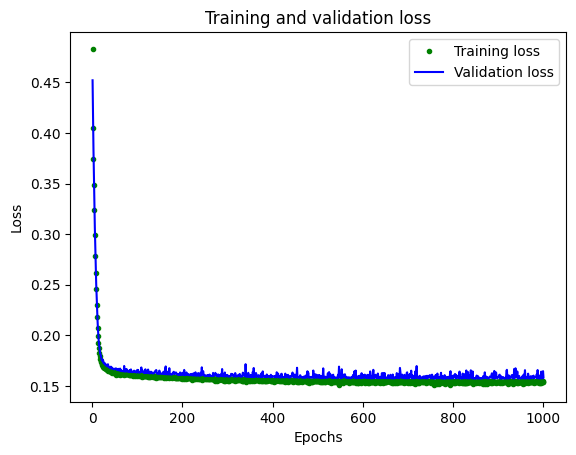

In [8]:
# Draw a graph of the loss, which is the distance between
# the predicted and actual values during training and validation.
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

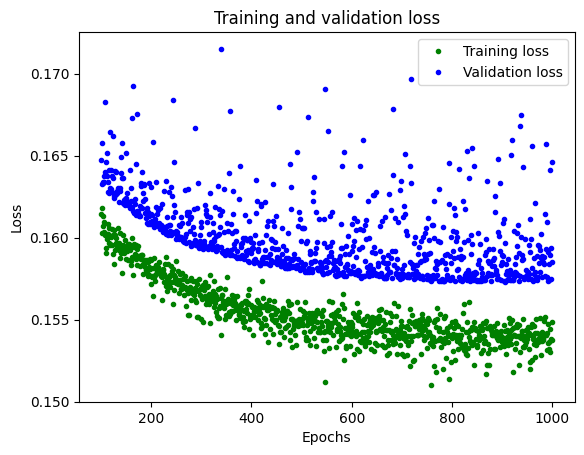

In [9]:
# Exclude the first few epochs so the graph is easier to read
SKIP = 100

plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


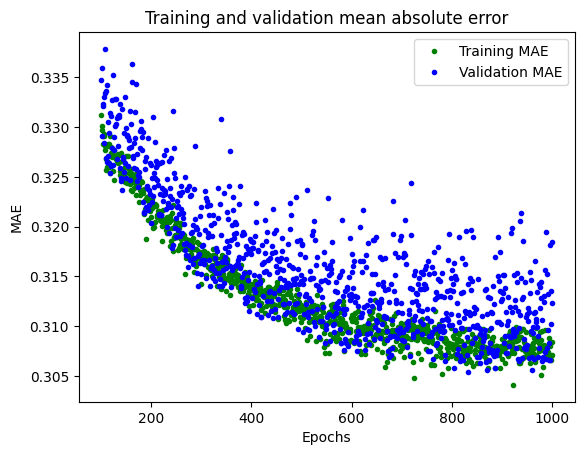

In [10]:
# Draw a graph of mean absolute error, which is another way of
# measuring the amount of error in the prediction.
mae = history_1.history['mae']
val_mae = history_1.history['val_mae']

plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

19/19 [==============================] - 0s 355us/step


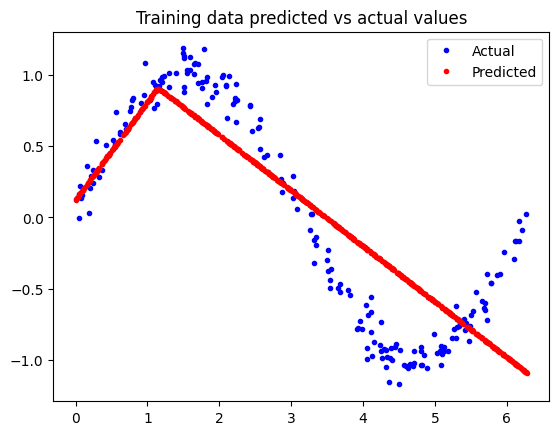

In [11]:

# Use the model to make predictions from our validation data
predictions = model_1.predict(x_train)

# Plot the predictions along with to the test data
plt.clf()
plt.title('Training data predicted vs actual values')
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_train, predictions, 'r.', label='Predicted')
plt.legend()
plt.show()

In [12]:
model_2 = tf.keras.Sequential()

# First layer takes a scalar input and feeds it through 16 "neurons". The
# neurons decide whether to activate based on the 'relu' activation function.
model_2.add(layers.Dense(16, activation='relu', input_shape=(1,)))

# The new second layer may help the network learn more complex representations
model_2.add(layers.Dense(16, activation='relu'))

# Final layer is a single neuron, since we want to output a single value
model_2.add(layers.Dense(1))

# Compile the model using a standard optimizer and loss function for regression
model_2.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# Show a summary of the model
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 16)                32        
                                                                 
 dense_3 (Dense)             (None, 16)                272       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [13]:
history_2 = model_2.fit(x_train, y_train, epochs=600, batch_size=16,
                    validation_data=(x_validate, y_validate))

Epoch 1/600
38/38 [==============================] - 0s 2ms/step - loss: 0.4709 - mae: 0.6035 - val_loss: 0.4344 - val_mae: 0.5762
Epoch 2/600
38/38 [==============================] - 0s 788us/step - loss: 0.3853 - mae: 0.5393 - val_loss: 0.3873 - val_mae: 0.5348
Epoch 3/600
38/38 [==============================] - 0s 746us/step - loss: 0.3355 - mae: 0.5031 - val_loss: 0.3300 - val_mae: 0.4982
Epoch 4/600
38/38 [==============================] - 0s 717us/step - loss: 0.2878 - mae: 0.4677 - val_loss: 0.2803 - val_mae: 0.4570
Epoch 5/600
38/38 [==============================] - 0s 713us/step - loss: 0.2438 - mae: 0.4330 - val_loss: 0.2339 - val_mae: 0.4161
Epoch 6/600
38/38 [==============================] - 0s 738us/step - loss: 0.2063 - mae: 0.3990 - val_loss: 0.2045 - val_mae: 0.3875
Epoch 7/600
38/38 [==============================] - 0s 754us/step - loss: 0.1812 - mae: 0.3735 - val_loss: 0.1811 - val_mae: 0.3703
Epoch 8/600
38/38 [==============================] - 0s 723us/step - lo

38/38 [==============================] - 0s 698us/step - loss: 0.0125 - mae: 0.0892 - val_loss: 0.0191 - val_mae: 0.1039
Epoch 124/600
38/38 [==============================] - 0s 686us/step - loss: 0.0127 - mae: 0.0910 - val_loss: 0.0134 - val_mae: 0.0930
Epoch 125/600
38/38 [==============================] - 0s 672us/step - loss: 0.0129 - mae: 0.0905 - val_loss: 0.0122 - val_mae: 0.0890
Epoch 126/600
38/38 [==============================] - 0s 680us/step - loss: 0.0123 - mae: 0.0894 - val_loss: 0.0125 - val_mae: 0.0877
Epoch 127/600
38/38 [==============================] - 0s 679us/step - loss: 0.0124 - mae: 0.0889 - val_loss: 0.0124 - val_mae: 0.0875
Epoch 128/600
38/38 [==============================] - 0s 685us/step - loss: 0.0120 - mae: 0.0882 - val_loss: 0.0149 - val_mae: 0.0962
Epoch 129/600
38/38 [==============================] - 0s 687us/step - loss: 0.0128 - mae: 0.0913 - val_loss: 0.0115 - val_mae: 0.0839
Epoch 130/600
38/38 [==============================] - 0s 682us/step 

Epoch 184/600
38/38 [==============================] - 0s 719us/step - loss: 0.0122 - mae: 0.0883 - val_loss: 0.0114 - val_mae: 0.0832
Epoch 185/600
38/38 [==============================] - 0s 696us/step - loss: 0.0118 - mae: 0.0881 - val_loss: 0.0130 - val_mae: 0.0917
Epoch 186/600
38/38 [==============================] - 0s 750us/step - loss: 0.0115 - mae: 0.0859 - val_loss: 0.0112 - val_mae: 0.0830
Epoch 187/600
38/38 [==============================] - 0s 702us/step - loss: 0.0118 - mae: 0.0871 - val_loss: 0.0117 - val_mae: 0.0855
Epoch 188/600
38/38 [==============================] - 0s 692us/step - loss: 0.0117 - mae: 0.0866 - val_loss: 0.0137 - val_mae: 0.0925
Epoch 189/600
38/38 [==============================] - 0s 680us/step - loss: 0.0118 - mae: 0.0871 - val_loss: 0.0132 - val_mae: 0.0919
Epoch 190/600
38/38 [==============================] - 0s 690us/step - loss: 0.0118 - mae: 0.0871 - val_loss: 0.0115 - val_mae: 0.0837
Epoch 191/600
38/38 [==============================] - 

Epoch 245/600
38/38 [==============================] - 0s 720us/step - loss: 0.0120 - mae: 0.0882 - val_loss: 0.0109 - val_mae: 0.0830
Epoch 246/600
38/38 [==============================] - 0s 700us/step - loss: 0.0124 - mae: 0.0887 - val_loss: 0.0151 - val_mae: 0.0987
Epoch 247/600
38/38 [==============================] - 0s 716us/step - loss: 0.0115 - mae: 0.0864 - val_loss: 0.0119 - val_mae: 0.0869
Epoch 248/600
38/38 [==============================] - 0s 689us/step - loss: 0.0118 - mae: 0.0879 - val_loss: 0.0189 - val_mae: 0.1034
Epoch 249/600
38/38 [==============================] - 0s 679us/step - loss: 0.0117 - mae: 0.0871 - val_loss: 0.0109 - val_mae: 0.0812
Epoch 250/600
38/38 [==============================] - 0s 706us/step - loss: 0.0118 - mae: 0.0873 - val_loss: 0.0110 - val_mae: 0.0826
Epoch 251/600
38/38 [==============================] - 0s 684us/step - loss: 0.0120 - mae: 0.0885 - val_loss: 0.0116 - val_mae: 0.0851
Epoch 252/600
38/38 [==============================] - 

Epoch 306/600
38/38 [==============================] - 0s 738us/step - loss: 0.0115 - mae: 0.0856 - val_loss: 0.0113 - val_mae: 0.0844
Epoch 307/600
38/38 [==============================] - 0s 706us/step - loss: 0.0120 - mae: 0.0881 - val_loss: 0.0120 - val_mae: 0.0866
Epoch 308/600
38/38 [==============================] - 0s 697us/step - loss: 0.0118 - mae: 0.0875 - val_loss: 0.0112 - val_mae: 0.0846
Epoch 309/600
38/38 [==============================] - 0s 702us/step - loss: 0.0118 - mae: 0.0867 - val_loss: 0.0110 - val_mae: 0.0823
Epoch 310/600
38/38 [==============================] - 0s 688us/step - loss: 0.0115 - mae: 0.0866 - val_loss: 0.0121 - val_mae: 0.0884
Epoch 311/600
38/38 [==============================] - 0s 693us/step - loss: 0.0119 - mae: 0.0873 - val_loss: 0.0116 - val_mae: 0.0848
Epoch 312/600
38/38 [==============================] - 0s 700us/step - loss: 0.0116 - mae: 0.0864 - val_loss: 0.0115 - val_mae: 0.0850
Epoch 313/600
38/38 [==============================] - 

Epoch 367/600
38/38 [==============================] - 0s 709us/step - loss: 0.0119 - mae: 0.0878 - val_loss: 0.0114 - val_mae: 0.0853
Epoch 368/600
38/38 [==============================] - 0s 698us/step - loss: 0.0118 - mae: 0.0866 - val_loss: 0.0113 - val_mae: 0.0846
Epoch 369/600
38/38 [==============================] - 0s 690us/step - loss: 0.0116 - mae: 0.0864 - val_loss: 0.0109 - val_mae: 0.0828
Epoch 370/600
38/38 [==============================] - 0s 684us/step - loss: 0.0114 - mae: 0.0854 - val_loss: 0.0129 - val_mae: 0.0891
Epoch 371/600
38/38 [==============================] - 0s 692us/step - loss: 0.0118 - mae: 0.0873 - val_loss: 0.0114 - val_mae: 0.0851
Epoch 372/600
38/38 [==============================] - 0s 692us/step - loss: 0.0116 - mae: 0.0865 - val_loss: 0.0110 - val_mae: 0.0825
Epoch 373/600
38/38 [==============================] - 0s 687us/step - loss: 0.0115 - mae: 0.0871 - val_loss: 0.0118 - val_mae: 0.0862
Epoch 374/600
38/38 [==============================] - 

Epoch 428/600
38/38 [==============================] - 0s 725us/step - loss: 0.0115 - mae: 0.0874 - val_loss: 0.0140 - val_mae: 0.0948
Epoch 429/600
38/38 [==============================] - 0s 708us/step - loss: 0.0118 - mae: 0.0872 - val_loss: 0.0126 - val_mae: 0.0884
Epoch 430/600
38/38 [==============================] - 0s 719us/step - loss: 0.0119 - mae: 0.0877 - val_loss: 0.0114 - val_mae: 0.0838
Epoch 431/600
38/38 [==============================] - 0s 724us/step - loss: 0.0115 - mae: 0.0866 - val_loss: 0.0125 - val_mae: 0.0897
Epoch 432/600
38/38 [==============================] - 0s 717us/step - loss: 0.0117 - mae: 0.0872 - val_loss: 0.0111 - val_mae: 0.0841
Epoch 433/600
38/38 [==============================] - 0s 745us/step - loss: 0.0115 - mae: 0.0870 - val_loss: 0.0130 - val_mae: 0.0895
Epoch 434/600
38/38 [==============================] - 0s 700us/step - loss: 0.0120 - mae: 0.0889 - val_loss: 0.0111 - val_mae: 0.0844
Epoch 435/600
38/38 [==============================] - 

Epoch 489/600
38/38 [==============================] - 0s 714us/step - loss: 0.0116 - mae: 0.0867 - val_loss: 0.0130 - val_mae: 0.0895
Epoch 490/600
38/38 [==============================] - 0s 691us/step - loss: 0.0118 - mae: 0.0873 - val_loss: 0.0107 - val_mae: 0.0809
Epoch 491/600
38/38 [==============================] - 0s 735us/step - loss: 0.0118 - mae: 0.0874 - val_loss: 0.0126 - val_mae: 0.0893
Epoch 492/600
38/38 [==============================] - 0s 704us/step - loss: 0.0121 - mae: 0.0887 - val_loss: 0.0116 - val_mae: 0.0851
Epoch 493/600
38/38 [==============================] - 0s 695us/step - loss: 0.0116 - mae: 0.0860 - val_loss: 0.0116 - val_mae: 0.0847
Epoch 494/600
38/38 [==============================] - 0s 701us/step - loss: 0.0119 - mae: 0.0884 - val_loss: 0.0142 - val_mae: 0.0924
Epoch 495/600
38/38 [==============================] - 0s 712us/step - loss: 0.0118 - mae: 0.0876 - val_loss: 0.0122 - val_mae: 0.0885
Epoch 496/600
38/38 [==============================] - 

Epoch 550/600
38/38 [==============================] - 0s 712us/step - loss: 0.0114 - mae: 0.0859 - val_loss: 0.0113 - val_mae: 0.0853
Epoch 551/600
38/38 [==============================] - 0s 699us/step - loss: 0.0112 - mae: 0.0844 - val_loss: 0.0129 - val_mae: 0.0910
Epoch 552/600
38/38 [==============================] - 0s 700us/step - loss: 0.0118 - mae: 0.0882 - val_loss: 0.0113 - val_mae: 0.0835
Epoch 553/600
38/38 [==============================] - 0s 700us/step - loss: 0.0117 - mae: 0.0873 - val_loss: 0.0124 - val_mae: 0.0887
Epoch 554/600
38/38 [==============================] - 0s 704us/step - loss: 0.0117 - mae: 0.0872 - val_loss: 0.0131 - val_mae: 0.0904
Epoch 555/600
38/38 [==============================] - 0s 693us/step - loss: 0.0116 - mae: 0.0865 - val_loss: 0.0109 - val_mae: 0.0825
Epoch 556/600
38/38 [==============================] - 0s 706us/step - loss: 0.0120 - mae: 0.0878 - val_loss: 0.0123 - val_mae: 0.0887
Epoch 557/600
38/38 [==============================] - 

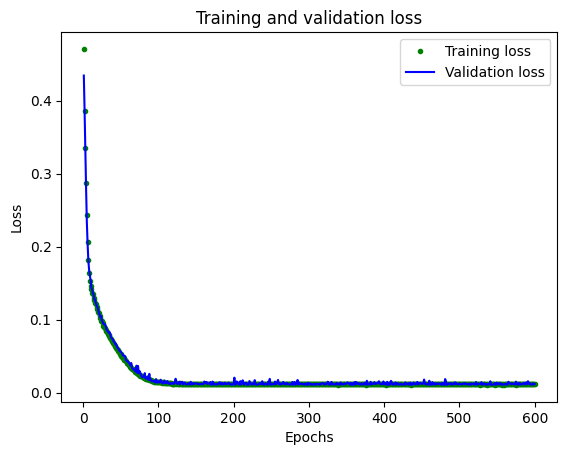

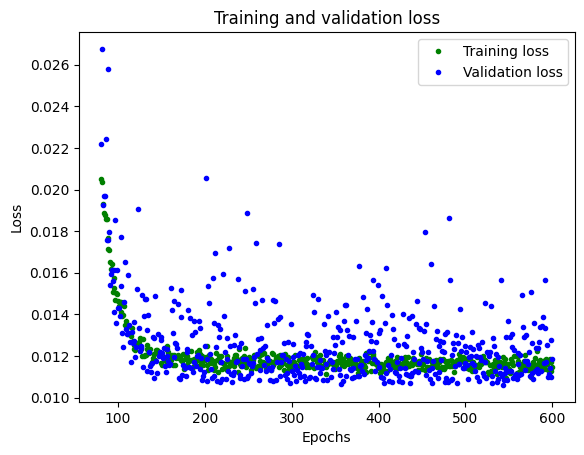

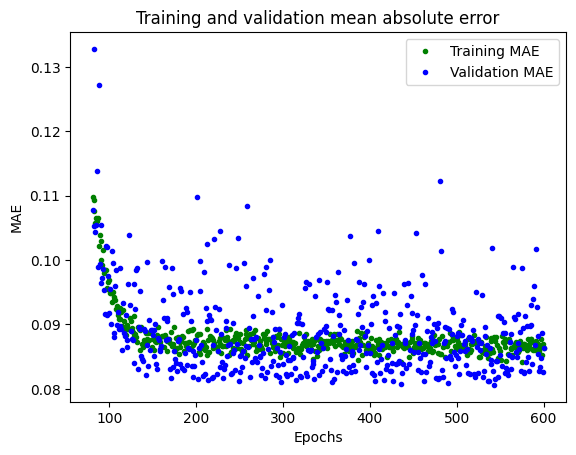

In [14]:
# Draw a graph of the loss, which is the distance between
# the predicted and actual values during training and validation.
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Exclude the first few epochs so the graph is easier to read
SKIP = 80

plt.clf()

plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()

# Draw a graph of mean absolute error, which is another way of
# measuring the amount of error in the prediction.
mae = history_2.history['mae']
val_mae = history_2.history['val_mae']

plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

7/7 [==============================] - 0s 497us/step


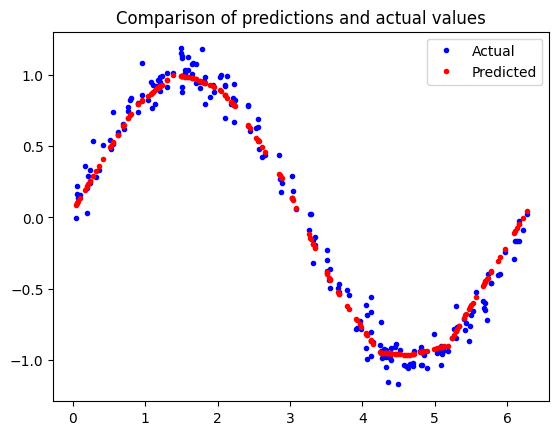

In [15]:
# Calculate and print the loss on our test dataset
loss = model_2.evaluate(x_test, y_test)

# Make predictions based on our test dataset
predictions = model_2.predict(x_test)

# Graph the predictions against the actual values
plt.clf()
plt.title('Comparison of predictions and actual values')
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_test, predictions, 'r.', label='Predicted')
plt.legend()
plt.show()

In [19]:
# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model_2)
tflite_model = converter.convert()

# Save the model to disk
open("models/sine_model.tflite", "wb").write(tflite_model)

# Convert the model to the TensorFlow Lite format with quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model_2)
# Indicate that we want to perform the default optimizations,
# which includes quantization
converter.optimizations = [tf.lite.Optimize.DEFAULT]
# Define a generator function that provides our test data's x values
# as a representative dataset, and tell the converter to use it
def representative_dataset_generator():
    for value in x_test:
        # Each scalar value must be inside of a 2D array that is wrapped in a list
        yield [np.array(value, dtype=np.float32, ndmin=2)]
converter.representative_dataset = representative_dataset_generator
# Convert the model
tflite_model = converter.convert()

# Save the model to disk
open("models/sine_model_quantized.tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: /var/folders/y3/vr_wt4191fg1wxp297qjknbc0000gp/T/tmpwrl2e0m_/assets


INFO:tensorflow:Assets written to: /var/folders/y3/vr_wt4191fg1wxp297qjknbc0000gp/T/tmpwrl2e0m_/assets
2022-12-20 15:33:41.956821: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2022-12-20 15:33:41.956835: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2022-12-20 15:33:41.956904: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /var/folders/y3/vr_wt4191fg1wxp297qjknbc0000gp/T/tmpwrl2e0m_
2022-12-20 15:33:41.957434: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2022-12-20 15:33:41.957440: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /var/folders/y3/vr_wt4191fg1wxp297qjknbc0000gp/T/tmpwrl2e0m_
2022-12-20 15:33:41.958807: I tensorflow/cc/saved_model/loader.cc:229] Restoring SavedModel bundle.
2022-12-20 15:33:41.971516: I tensorflow/cc/saved_model/loader.cc:213] Running initialization

INFO:tensorflow:Assets written to: /var/folders/y3/vr_wt4191fg1wxp297qjknbc0000gp/T/tmp8jsibpds/assets


INFO:tensorflow:Assets written to: /var/folders/y3/vr_wt4191fg1wxp297qjknbc0000gp/T/tmp8jsibpds/assets
/Users/pt/hacking/tiny_trigger/.venv/lib/python3.9/site-packages/tensorflow/lite/python/convert.py:765: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "
2022-12-20 15:33:42.984454: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2022-12-20 15:33:42.984467: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2022-12-20 15:33:42.984541: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /var/folders/y3/vr_wt4191fg1wxp297qjknbc0000gp/T/tmp8jsibpds
2022-12-20 15:33:42.985150: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2022-12-20 15:33:42.985156: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug in

3040

# check converted models

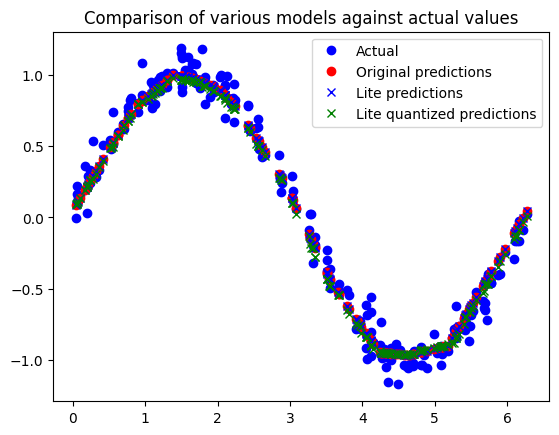

In [20]:
# Instantiate an interpreter for each model
sine_model = tf.lite.Interpreter('models/sine_model.tflite')
sine_model_quantized = tf.lite.Interpreter('models/sine_model_quantized.tflite')

# Allocate memory for each model
sine_model.allocate_tensors()
sine_model_quantized.allocate_tensors()

# Get indexes of the input and output tensors
sine_model_input_index = sine_model.get_input_details()[0]["index"]
sine_model_output_index = sine_model.get_output_details()[0]["index"]
sine_model_quantized_input_index = sine_model_quantized.get_input_details()[0]["index"]
sine_model_quantized_output_index = sine_model_quantized.get_output_details()[0]["index"]

# Create arrays to store the results
sine_model_predictions = []
sine_model_quantized_predictions = []

# Run each model's interpreter for each value and store the results in arrays
for x_value in x_test:
    # Create a 2D tensor wrapping the current x value
    x_value_tensor = tf.convert_to_tensor([[x_value]], dtype=np.float32)
    # Write the value to the input tensor
    sine_model.set_tensor(sine_model_input_index, x_value_tensor)
    # Run inference
    sine_model.invoke()
    # Read the prediction from the output tensor
    sine_model_predictions.append(
      sine_model.get_tensor(sine_model_output_index)[0])
    # Do the same for the quantized model
    sine_model_quantized.set_tensor(sine_model_quantized_input_index, x_value_tensor)
    sine_model_quantized.invoke()
    sine_model_quantized_predictions.append(
      sine_model_quantized.get_tensor(sine_model_quantized_output_index)[0])


# See how they line up with the data
plt.clf()
plt.title('Comparison of various models against actual values')
plt.plot(x_test, y_test, 'bo', label='Actual')
plt.plot(x_test, predictions, 'ro', label='Original predictions')
plt.plot(x_test, sine_model_predictions, 'bx', label='Lite predictions')
plt.plot(x_test, sine_model_quantized_predictions, 'gx', label='Lite quantized predictions')
plt.legend()
plt.show()

In [22]:
import os
basic_model_size = os.path.getsize("models/sine_model.tflite")
print("Basic model is %d bytes" % basic_model_size)
quantized_model_size = os.path.getsize("models/sine_model_quantized.tflite")
print("Quantized model is %d bytes" % quantized_model_size)
difference = basic_model_size - quantized_model_size
print("Difference is %d bytes" % difference)

Basic model is 3192 bytes
Quantized model is 3040 bytes
Difference is 152 bytes


In [23]:
# Save the file as a C source file
!xxd -i models/sine_model_quantized.tflite > models/sine_model_quantized.cc
# Print the source file
!cat models/sine_model_quantized.cc

unsigned char models_sine_model_quantized_tflite[] = {
  0x1c, 0x00, 0x00, 0x00, 0x54, 0x46, 0x4c, 0x33, 0x14, 0x00, 0x20, 0x00,
  0x1c, 0x00, 0x18, 0x00, 0x14, 0x00, 0x10, 0x00, 0x0c, 0x00, 0x00, 0x00,
  0x08, 0x00, 0x04, 0x00, 0x14, 0x00, 0x00, 0x00, 0x1c, 0x00, 0x00, 0x00,
  0x88, 0x00, 0x00, 0x00, 0xe0, 0x00, 0x00, 0x00, 0xac, 0x03, 0x00, 0x00,
  0xbc, 0x03, 0x00, 0x00, 0x58, 0x0b, 0x00, 0x00, 0x03, 0x00, 0x00, 0x00,
  0x01, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00, 0x02, 0xfc, 0xff, 0xff,
  0x0c, 0x00, 0x00, 0x00, 0x1c, 0x00, 0x00, 0x00, 0x38, 0x00, 0x00, 0x00,
  0x0f, 0x00, 0x00, 0x00, 0x73, 0x65, 0x72, 0x76, 0x69, 0x6e, 0x67, 0x5f,
  0x64, 0x65, 0x66, 0x61, 0x75, 0x6c, 0x74, 0x00, 0x01, 0x00, 0x00, 0x00,
  0x04, 0x00, 0x00, 0x00, 0x94, 0xff, 0xff, 0xff, 0x0b, 0x00, 0x00, 0x00,
  0x04, 0x00, 0x00, 0x00, 0x07, 0x00, 0x00, 0x00, 0x64, 0x65, 0x6e, 0x73,
  0x65, 0x5f, 0x34, 0x00, 0x01, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00,
  0xd6, 0xfc, 0xff, 0xff, 0x04, 0x00, 0x00, 0x00, 0x0d, 0